![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [2]:
my_folder = "/content/drive/MyDrive/Semestre 7/AI II/SAS_CORTEX"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/Semestre 7/AI II/SAS_CORTEX


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [3]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [4]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [5]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 6.7 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=e82ee0d21a8a38d26c5286459ab34d667444116c4030cdc104c3bbf5c5cfaef2
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [6]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
#'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [7]:
# %%writefile .authinfo
# oda user a01137848@tec.mx password Saas.382

Copy this file to home

In [8]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [9]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/Semestre 7/AI II/SAS_CORTEX/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 361



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/Semestre 7/AI II/SAS_CORTEX/sascfg_personal.py
WORK Path             = /saswork/SAS_workA2EC00013358_odaws04-usw2.oda.sas.com/SAS_work6B8800013358_odaws04-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 78680


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [10]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 04:02:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 04:02:00 PM

33         


For local Jupyter

In [11]:
# No hay necesidad de correr esta parte porque lo estamos haciendo desde colab
# %%SAS sas_session
# libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [12]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

## Merge the Data

In [44]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)
#data_merge.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
795326,2795327.0,VAILLANCOURT,ERIN,1.0,63.0,108800.0,University / College,Downtown,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
477792,2477793.0,MERRITT,VANNESSA,1.0,25.0,27400.0,University / College,Suburban,6.0,2.0,...,2.0,3.0,4.0,95.0,20.0,50.0,1.0,20.0,0.0,0.0
671206,2671207.0,OBRIAN,AGNES,1.0,57.0,27400.0,High School,Rural,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
641008,2641009.0,LEAKE,EDITH,1.0,29.0,61700.0,University / College,Suburban,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,50.0,0.0,0.0
313485,2313486.0,GOMEZROMERO,STEPHEN,0.0,30.0,59800.0,University / College,Downtown,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## Analysing the data

### General info

In [14]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

Tamaño del dataset. Por el momento sabemos que hay 20 variables con 1,000,000 registros. Cabe mencionar que alguno de las variables pueden contener datos nulos.

In [15]:
data_merge.shape[0]

1000000

Estadística descriptiva

In [16]:
data_merge.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.122232,7.741080
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.327554,83.110552
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,10000.000000


In [17]:
data_merge.describe(include=['O'])

,LastName,FirstName,Education,City
count,999977,999996,1000000,1000000
unique,103117,5159,3,4
top,SMITH,JAMES,University / College,City
freq,9359,17936,647904,332657


Datos faltantes

In [18]:
data_merge.isna().sum()

ID                   0
LastName            23
FirstName            4
Woman                0
Age                  0
Salary               0
Education            0
City                 0
SeniorList           0
NbActivities         0
Referrals            0
Recency         663666
Frequency       663666
Seniority       663666
TotalGift       663666
MinGift         663666
MaxGift         663666
GaveLastYear         0
AmtLastYear          0
GaveThisYear         0
AmtThisYear          0
dtype: int64

Cantidad de registros duplicaos

In [19]:
data_merge.duplicated().sum()

0

Se van a eliminar las variables de identificación de los datos (ID, LastName y FirstName) debido a que no aporta información relevante mas que para la identificación del registro y no se detecto ningún registro duplicado.

In [20]:
#del(data_merge['ID'])
del(data_merge['LastName'])
del(data_merge['FirstName'])
del(data_merge['GaveThisYear'])
print(data_merge.columns)

Index(['ID', 'Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList',
       'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear',
       'AmtThisYear'],
      dtype='object')


### Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


recency (num of years since last donation) 

seniority (num of years since first donation) 

Para los datos faltantes de la siquientes variables:
- 'MaxGift' se remplazó por el valor más **alto** de 'AmtLastYear' y 'AmtThisYear'
- 'MinGift' se remplazó por el valor más **bajo** de 'AmtLastYear' y 'AmtThisYear'
- 'TotalGift' se remplazó por la suma de 'MaxGift' y 'MinGift'
- 'Frequency' se remplazó por un 
  - 2 si 'GaveLastYear' y 'GaveThisYear' eran verdaderos
  - la mediana de 'Frequency'  al resto
- 'Seniority' se remplazó por 'Frequency'
- 'Recency' se remplazó por
  - 1 si 'GaveLastYear' era verdadero
  - la mediana de 'Recency' si 'GaveLastYear' era falso

In [45]:
prueba = data_merge

prueba['MaxGift'] = prueba['MaxGift'].mask(prueba['MaxGift'].isna() , prueba['AmtLastYear'])
prueba['MinGift'] = prueba['MinGift'].mask(prueba['MinGift'].isna(), prueba['AmtLastYear'])
prueba['TotalGift'] = prueba['TotalGift'].mask(prueba['TotalGift'].isna(), (prueba['MaxGift'] + prueba['MinGift']))

prueba['Recency'] = prueba['Recency'].mask((prueba['Recency'].isna()) & (prueba['GaveLastYear'] == 1), 1)
prueba['Recency'] = prueba['Recency'].mask((prueba['Recency'].isna()), prueba['Recency'].median())

prueba['Frequency'] = prueba['Frequency'].mask((prueba['Frequency'].isna()) & (prueba['GaveLastYear'] == 1), 1)
prueba['Frequency'] = prueba['Frequency'].mask((prueba['Frequency'].isna()), prueba['Frequency'].median())

prueba['Seniority'] = prueba['Seniority'].mask((prueba['Seniority'].isna()), prueba['Frequency'])

#prueba['MaxGift'] = prueba['MaxGift'].mask(prueba['MaxGift'].isna() , 0)
#prueba['MinGift'] = prueba['MinGift'].mask(prueba['MinGift'].isna(), 0)
#prueba['TotalGift'] = prueba['TotalGift'].mask(prueba['TotalGift'].isna(),0)

#prueba['Frequency'] = prueba['Frequency'].mask((prueba['Frequency'].isna()), 1) #prueba['Frequency'].mode()
#prueba['Seniority'] = prueba['Seniority'].mask((prueba['Seniority'].isna()), prueba['Frequency'])
#prueba['Recency'] = prueba['Recency'].mask((prueba['Recency'].isna()) & (prueba['GaveLastYear'] == 1), 1)
#prueba['Recency'] = prueba['Recency'].mask((prueba['Recency'].isna()), 1) #prueba['Recency'].mode())

data_merge = prueba
data_merge.isna().sum()

ID               0
LastName        23
FirstName        4
Woman            0
Age              0
Salary           0
Education        0
City             0
SeniorList       0
NbActivities     0
Referrals        0
Recency          0
Frequency        0
Seniority        0
TotalGift        0
MinGift          0
MaxGift          0
GaveLastYear     0
AmtLastYear      0
GaveThisYear     0
AmtThisYear      0
dtype: int64

### Outliers

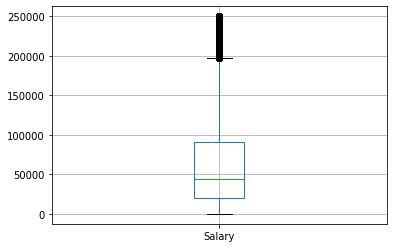

In [21]:
data_merge.boxplot(column=['Salary'])

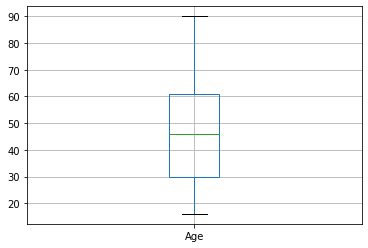

In [22]:
data_merge.boxplot(column=['Age'])

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


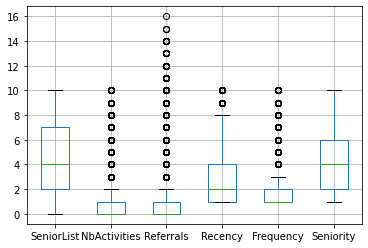

In [23]:
data_merge.boxplot(column=['SeniorList','NbActivities', 'Referrals', 'Recency','Frequency', 'Seniority']) 

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


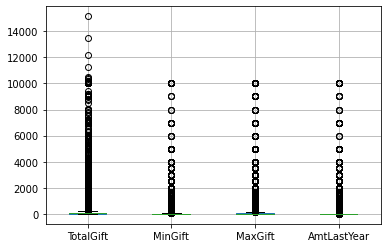

In [24]:
data_merge.boxplot(column=['TotalGift', 'MinGift', 'MaxGift', 'AmtLastYear']) 

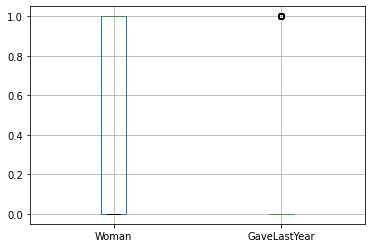

In [25]:
data_merge.boxplot(column=['Woman','GaveLastYear']) 

Las variables a las que se le van a eliminar los outlier son 'NbActivities', 'Referrals', 'Seniority'

In [26]:
def outliers(df,column):
  Q1 = df[column].quantile(.25)
  Q3 = df[column].quantile(.75)
  IQR = Q3 - Q1

  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  indexList = df.index[(df[column] < lower) | (df[column] > upper)]
  return indexList

In [27]:
# Remove outliers
def remove(df,indexList):
  indexList = sorted(set(indexList))
  print("Número de elementos por eliminar",len(indexList))
  df = df.drop(indexList)
  print("Tamaño del dataset",df.shape[0])
  return df

In [28]:
# indices from multiple columns

index_list = []
for feature in ['NbActivities', 'Referrals', 'Seniority']:
  index_list.extend(outliers(data_merge,feature))

len(index_list)

112289

In [48]:
df = remove(data_merge,index_list)

Número de elementos por eliminar 90478
Tamaño del dataset 909522


In [30]:
df.shape[0]

909522

### Transforming the data

Convertir variables flotantes a variables categoricas y despues a variables numéricas

In [60]:
# df has the outliers deleted

df["Education"] = df["Education"].astype('category')
df["City"] = df["City"].astype('category')

df["Education"] = df["Education"].cat.codes
df["City"] = df["City"].cat.codes
df.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2,0,2.0,0.0,...,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,1,2,4.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,2,2,5.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,1,2,3.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,2,2,8.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Standarization

In [57]:
# Estandarizar los datos
'''
from sklearn.preprocessing import StandardScaler
x = df[['ID','Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList','NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear']] 
y = df[['AmtThisYear']]

id = df[['ID']]
x_for_STD = df[['GaveLastYear', 'AmtLastYear', 'Woman', 'Age', 'Salary', 'Education',
       'City', 'SeniorList', 'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift', 'MinGift', 'MaxGift']]

x_std2 = pd.DataFrame(StandardScaler().fit_transform(x_for_STD), columns=['Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList', 'NbActivities', 
    'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear'])

x_std = pd.concat([id,x_std2], axis=1)
x_std.head()
'''

"\nfrom sklearn.preprocessing import StandardScaler\nx = df[['ID','Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList','NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',\n       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear']] \ny = df[['AmtThisYear']]\n\nid = df[['ID']]\nx_for_STD = df[['GaveLastYear', 'AmtLastYear', 'Woman', 'Age', 'Salary', 'Education',\n       'City', 'SeniorList', 'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift', 'MinGift', 'MaxGift']]\n\nx_std2 = pd.DataFrame(StandardScaler().fit_transform(x_for_STD), columns=['Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList', 'NbActivities', \n    'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear'])\n\nx_std = pd.concat([id,x_std2], axis=1)\nx_std.head()\n"

## Analysing the variables

### Correlation between variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_norm.corr()

,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,AmtThisYear
Woman,1.000000,0.037554,-0.046232,-0.019506,0.002213,0.000245,0.000320,-0.000450,-0.000586,0.001445,0.000402,0.017481,0.016765,0.019035,-0.000524,0.011167,0.012103
Age,0.037554,1.000000,0.019051,-0.109483,0.000148,0.000802,0.001272,-0.001103,0.000738,0.000410,0.001839,-0.017517,-0.017601,-0.018812,-0.000521,-0.011570,-0.012155
Salary,-0.046232,0.019051,1.000000,0.219167,-0.003451,0.000441,0.002186,-0.000277,-0.000412,0.001252,-0.000194,0.026991,0.027120,0.028774,0.001097,0.019797,0.019312
Education,-0.019506,-0.109483,0.219167,1.000000,-0.013517,-0.000544,-0.002429,-0.003878,-0.003751,-0.000433,-0.003161,0.009081,0.009542,0.009385,-0.000493,0.006562,0.005755
City,0.002213,0.000148,-0.003451,-0.013517,1.000000,0.022578,-0.027920,-0.027827,-0.024339,-0.014776,-0.019867,-0.011649,-0.010820,-0.012433,-0.026378,-0.008076,-0.009773
SeniorList,0.000245,0.000802,0.000441,-0.000544,0.022578,1.000000,0.306312,0.299672,0.077035,0.039926,0.148428,-0.004466,0.004357,0.007286,-0.074875,-0.020825,-0.024093
NbActivities,0.000320,0.001272,0.002186,-0.002429,-0.027920,0.306312,1.000000,0.273177,0.141128,0.138783,0.197019,0.050833,0.050826,0.062670,0.072884,0.025378,0.022638
Referrals,-0.000450,-0.001103,-0.000277,-0.003878,-0.027827,0.299672,0.273177,1.000000,0.128750,0.118997,0.177800,0.042005,0.044383,0.051972,0.061006,0.020562,0.018217
Recency,-0.000586,0.000738,-0.000412,-0.003751,-0.024339,0.077035,0.141128,0.128750,1.000000,0.013048,0.742274,0.163293,0.180195,0.161028,0.499170,0.124203,0.019683
Frequency,0.001445,0.000410,0.001252,-0.000433,-0.014776,0.039926,0.138783,0.118997,0.013048,1.000000,0.450634,0.111167,0.014937,0.123928,0.062422,0.021035,0.019061


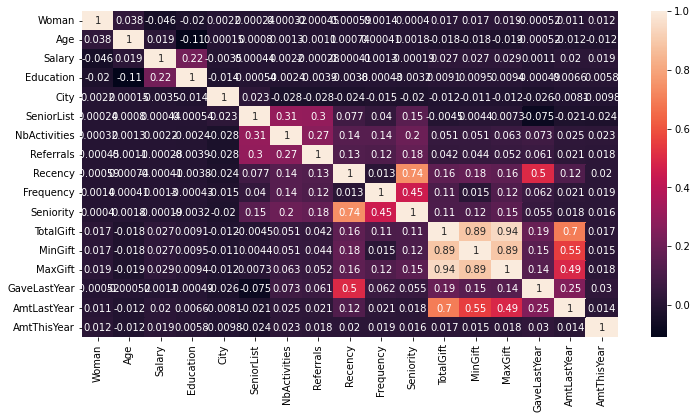

In [ ]:
cor = df_norm.corr()
sns.heatmap(cor, annot=True)

### PCA (Principal Components Analysis)

In [ ]:
X = df_std[['Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList','NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear']] 
Y = df_std['AmtThisYear']

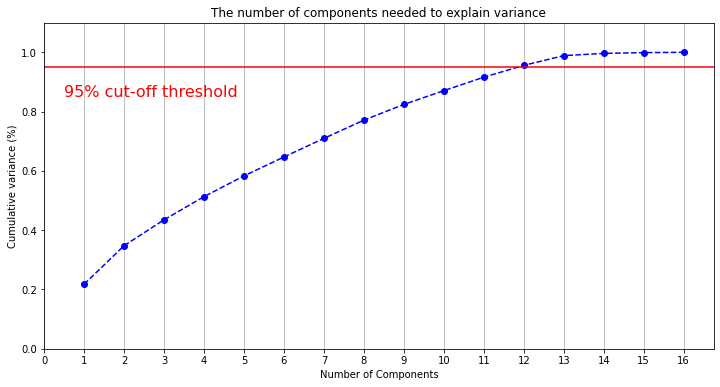

In [ ]:
# https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import numpy as np

pca = PCA().fit(X)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 17, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 17, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
# How much each component contributes to the overall variance
explained_variance = np.round(pca.explained_variance_ratio_, decimals=4) * 100
explained_variance

array([21.78, 12.98,  8.75,  7.8 ,  7.  ,  6.38,  6.27,  6.15,  5.29,
        4.64,  4.54,  3.99,  3.29,  0.74,  0.26,  0.12])

In [ ]:
pca=PCA(n_components=12)
pca.fit(X)

PCA(n_components=12)

In [ ]:
scores=pca.transform(X)
df_pca_x = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10', 'PC11','PC12'])
df_pca_x.shape

(774827, 12)

In [ ]:
df_pca = pd.concat([df_pca_x,Y], axis=1)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,AmtThisYear
0,7.994038,0.509529,1.073192,-1.423333,6.478662,-1.012895,-1.642843,0.778944,1.345530,-0.147937,0.123224,0.364447,-0.086469
1,-0.239782,-0.557846,1.384133,1.449614,-0.527156,-0.408854,0.093086,-0.859378,0.608171,-0.548371,0.084029,-1.003781,-0.086469
2,-0.503602,0.609795,0.221725,-0.306999,0.179726,-0.066505,0.409530,-1.237984,-0.244571,0.302823,-0.035728,0.563082,-0.086469
3,-0.575822,0.731130,-0.208766,1.915179,0.347684,1.327541,0.377787,-0.045159,-0.108375,0.150405,0.009348,0.123676,-0.086469
4,-0.466653,0.336253,0.719337,-0.480937,-0.035595,-0.093263,0.525909,-1.279125,-0.499810,0.121767,-0.105621,1.235401,-0.086469


In [ ]:
df2 = df[['Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList','NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear']]
cor=(pd.DataFrame(pca.components_,columns=df2.columns,index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10', 'PC11','PC12']))

sns.heatmap(cor, annot=True)

## Data Partition

In [61]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
#x = df_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10', 'PC11']] 
x = df[['ID','Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList','NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear']] 
y = df[['AmtThisYear']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=12345) 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(545713, 17)
(363809, 17)
(545713, 1)
(363809, 1)


## Models
***


In [53]:
import numpy as np
from sklearn import metrics
def modelMetrics(modelName,model, y_test, prediction):
  print(modelName)
  print("MAE = ",metrics.mean_absolute_error(y_test,prediction))
  print("MSE = ",metrics.mean_squared_error(y_test,prediction))
  print("RMSE = ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))
  print("Score = ",model.score(x_test, y_test))

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.

In [ ]:
from sklearn import linear_model

regr_model = linear_model.LinearRegression()
regr_model.fit(x_train,y_train)
regr_predict=regr_model.predict(x_test)

modelMetrics("Linear regression Model",regr_model,y_test,regr_predict)

Linear regression Model
MAE =  11.121576901988961
MSE =  6389.752248411483
RMSE =  79.93592589325205
Score =  0.003575382720080511


### **Decision Tree Regression Model**

In [65]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)

DT_predict = DT_model.predict(x_test) #Predictions on Testing data

modelMetrics("Decission tree regression Model",DT_model,y_test,DT_predict)

Decission tree regression Model
MAE =  11.550193538415675
MSE =  5390.436870631613
RMSE =  73.41959459593612
Score =  -0.0037161126221374463


In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [ ]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': sp_randFloat(),
              'subsample'    : sp_randFloat(),
              'n_estimators' : sp_randInt(100, 1000),
              'max_depth'    : sp_randInt(4, 10)
              }

In [ ]:
randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 2, n_iter = 5, n_jobs=-1)
randm_src.fit(x_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

In [54]:
x_train.isna().sum()

ID              0
Woman           0
Age             0
Salary          0
Education       0
City            0
SeniorList      0
NbActivities    0
Referrals       0
Recency         0
Frequency       0
Seniority       0
TotalGift       0
MinGift         0
MaxGift         0
GaveLastYear    0
AmtLastYear     0
dtype: int64

In [63]:
tuned_GBR_model = GradientBoostingRegressor(learning_rate=0.057801700487116414, max_depth=6, n_estimators=541, subsample=0.39013247855581323)
tuned_GBR_model.fit(x_train,y_train)
tuned_GBR_predict = tuned_GBR_model.predict(x_test)

modelMetrics("GBR Model",tuned_GBR_model,y_test,tuned_GBR_predict)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [ ]:
# Hyper parameters range intialization for tuning 
model_DT = DecisionTreeRegressor()
parameters_DT={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
random_tree = RandomizedSearchCV(estimator=model_DT, param_distributions = parameters_DT, cv = 2, n_iter = 10, n_jobs=-1)
random_tree.fit(x_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", random_tree.best_estimator_)
print("\n The best score across ALL searched params:\n", random_tree.best_score_)
print("\n The best parameters across ALL searched params:\n", random_tree.best_params_)


 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=10,
                      min_samples_leaf=6, splitter='random')

 The best score across ALL searched params:
 0.001987779140595225

 The best parameters across ALL searched params:
 {'splitter': 'random', 'min_samples_leaf': 6, 'max_leaf_nodes': 10, 'max_features': 'auto', 'max_depth': 7}


### **Ridge regression**

In [ ]:
from sklearn import linear_model
ridge_model = linear_model.Ridge(alpha=.5)
ridge_model.fit(x_train, y_train)

ridge_predict = ridge_model.predict(x_test)

modelMetrics("Ridge regression Model",ridge_model,y_test,ridge_predict)

Ridge regression Model
MAE =  11.121576034384306
MSE =  6389.752278023126
RMSE =  79.93592607847316
Score =  0.003575378102410154


### **Random forest regression**

In [ ]:

from sklearn.ensemble import RandomForestRegressor
forest_model=RandomForestRegressor(n_estimators=10, max_features=2, max_leaf_nodes=5,random_state=42)
forest_model.fit(x_train, y_train)

forest_predictions = forest_model.predict(x_test)

modelMetrics("Random Forest Model",forest_model,y_test,forest_predictions)


Random Forest Model
MAE =  13.254014131248884
MSE =  7613.620900938177
RMSE =  87.2560651240828
Score =  0.002945150686446407


 **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


## Scoring New Data

### Prepare data for scoring

In [66]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [ ]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

id = scoring_data['ID']

# DELETE VARIABLES 
del(scoring_data['LastName'])
del(scoring_data['FirstName'])

# MISSING VALUES
prueba = scoring_data

prueba['MaxGift'] = prueba['MaxGift'].mask(prueba['MaxGift'].isna() , prueba['AmtLastYear'])
prueba['MinGift'] = prueba['MinGift'].mask(prueba['MinGift'].isna(), prueba['AmtLastYear'])
prueba['TotalGift'] = prueba['TotalGift'].mask(prueba['TotalGift'].isna(), (prueba['MaxGift'] + prueba['MinGift']))

prueba['Frequency'] = prueba['Frequency'].mask((prueba['Frequency'].isna()), prueba['Frequency'].median())

prueba['Seniority'] = prueba['Seniority'].mask((prueba['Seniority'].isna()), prueba['Frequency'])

prueba['Recency'] = prueba['Recency'].mask((prueba['Recency'].isna()) & (prueba['Recency'] == 1), 1)
prueba['Recency'] = prueba['Recency'].mask((prueba['Recency'].isna()), prueba['Recency'].median())

scoring_data = prueba

# TRANSFORMING DATA
scoring_data["Education"] = scoring_data["Education"].astype('category')
scoring_data["City"] = scoring_data["City"].astype('category')

scoring_data["Education"] = scoring_data["Education"].cat.codes
scoring_data["City"] = scoring_data["City"].cat.codes


In [ ]:
scoring_data.isna().sum()

ID              0
GaveLastYear    0
AmtLastYear     0
Woman           0
Age             0
Salary          0
Education       0
City            0
SeniorList      0
NbActivities    0
Referrals       0
Recency         0
Frequency       0
Seniority       0
TotalGift       0
MinGift         0
MaxGift         0
dtype: int64

In [ ]:
scoring_data.columns

Index(['ID', 'GaveLastYear', 'AmtLastYear', 'Woman', 'Age', 'Salary',
       'Education', 'City', 'SeniorList', 'NbActivities', 'Referrals',
       'Recency', 'Frequency', 'Seniority', 'TotalGift', 'MinGift', 'MaxGift'],
      dtype='object')

In [ ]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data[['ID','Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList','NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear']] 
final_prediction=tuned_GBR_model.predict(X)

scoring_data['Prediction'] = final_prediction
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)
scoring_data.head()

,ID,GaveLastYear,AmtLastYear,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,Prediction
90340,2090341.0,0.0,0.0,0.0,71.0,83600.0,2,3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5000.0
986689,2986690.0,0.0,0.0,0.0,69.0,83600.0,2,3,10.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5000.0
349244,2349245.0,0.0,0.0,0.0,62.0,83600.0,2,3,6.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5000.0
364353,2364354.0,0.0,0.0,1.0,62.0,83600.0,2,0,10.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5000.0
45718,2045719.0,0.0,0.0,0.0,62.0,83600.0,2,1,8.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5000.0


## Exporting Results to a CSV File

In [ ]:
Result= scoring_data[['ID']].astype(int)

Result.head()
Result.to_csv('Round1_Output2.csv', index=False)

In [ ]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 10000
submission = Result.head(NB)
submission.to_csv('Round1 Output.csv', index=False)

In [ ]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.


In [ ]:
!head Round1\ Output.csv